In [25]:
import networkx as nx
import osmnx as ox
import pickle

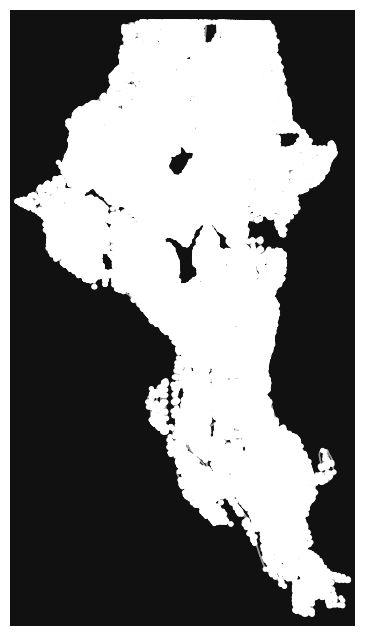

In [2]:
G = ox.graph_from_place("Seattle, Washington, USA", network_type="walk")
fig, ax = ox.plot_graph(G)

In [26]:
with open("./data/seattle_networkx_graph.pkl", "wb") as fout:
    pickle.dump(G, fout)

In [3]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
29449863,47.643976,-122.304067,traffic_signals,4,NaN,POINT (-122.30407 47.64398)
29462909,47.641088,-122.297930,NaN,3,NaN,POINT (-122.29793 47.64109)
29464223,47.643918,-122.304207,traffic_signals,3,NaN,POINT (-122.30421 47.64392)
29464742,47.658325,-122.301425,NaN,3,NaN,POINT (-122.30143 47.65832)
29464746,47.656011,-122.302121,NaN,3,NaN,POINT (-122.30212 47.65601)


In [10]:
gdf_nodes.to_csv(f"./data/seattle_network_nodes.csv")
gdf_edges.to_csv(f"./data/seattle_network_edges.csv")